In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.cm as cm

In [24]:
timed_dir = 'datasets/CleanedTimedData.csv'
seq_dir = 'datasets/assessorSequential.csv'

In [25]:
timed_df = pd.read_csv(timed_dir)

In [26]:
timed_df.head(5)

,Date Sampled,Address,First Draw,2-3 Minute,5 Minute
0,12/21/2021,103XX S PRAIRIE AVE,0.5,0.5,0.5
1,12/14/2021,106XX S GLENROY AVE,0.5,0.5,0.5
2,12/21/2021,108XX S HOYNE AVE,0.5,0.5,0.5
3,2/2/2022,10XX N MARSHFIELD AVE,0.5,0.5,0.5
4,11/22/2021,10XX W 34TH PL,0.5,0.5,0.5


In [27]:
timed_df['Second Draw'] = timed_df['2-3 Minute']
timed_df['Third Draw'] = timed_df['5 Minute']

timed_df = timed_df.drop(['2-3 Minute', '5 Minute'], axis=1)

In [28]:
# find number of points 
nQuantiles = len(timed_df.index)

# take only the two columns you want 
# df_ = df[['Tract Median Income', 'avg']]
# sort by increasing income 
timed_df.sort_values(by=['First Draw'], inplace=True)

# calculate quantiles 
quantiles = np.linspace(float(1/(2*nQuantiles)), 1-float(1/(2*nQuantiles)), nQuantiles)
# add quantiles to dataframe 
timed_df['quantile'] = quantiles

In [29]:
timed_df[timed_df['quantile'] >= 0.9]

,Date Sampled,Address,First Draw,Second Draw,Third Draw,quantile
25141,2/3/2020,45XX N KEDVALE AVE,6.60,4.7,1.80,0.900014
25136,6/24/2019,42XX S UNION AVE,6.60,14,4.80,0.900050
25186,2/27/2016,62XX N MANDELL AVE,6.61,3.91,3.57,0.900086
25249,6/24/2019,72XX N BELL AVE,6.70,6.4,4.70,0.900121
25250,6/28/2018,72XX W MYRTLE AVE,6.70,3.2,2.90,0.900157
...,...,...,...,...,...,...
27889,10/8/2019,84XX S Manistee Ave,1100.00,16.0,10.00,0.999839
27868,10/11/2019,115XX S Justine St,1300.00,11,6.50,0.999875
27869,3/18/2020,48XX N Merrimac Ave,4000.00,7.4,2.60,0.999911
27870,11/21/2019,76XX S DAMEN AVE,4100.00,3.6,1.30,0.999946


In [30]:
timed_df_q = timed_df[timed_df['quantile'] >= 0.9]

In [31]:
timed_df[timed_df['First Draw'] == min(timed_df['First Draw'])]

,Date Sampled,Address,First Draw,Second Draw,Third Draw,quantile
0,12/21/2021,103XX S PRAIRIE AVE,0.5,0.5,0.5,0.000018
233,1/23/2022,50XX N BERNARD ST,0.5,0.5,0.5,0.000054
232,3/23/2022,4XX W ROOT ST,0.5,0.5,0.5,0.000089
231,4/10/2022,4XX W MELROSE ST,0.5,0.5,0.5,0.000125
230,4/6/2022,4XX W DIVERSEY PKWY,0.5,0.5,0.5,0.000161
...,...,...,...,...,...,...
111,11/18/2021,23XX N CLEVELAND AVE,0.5,0.5,0.5,0.012010
110,3/4/2022,22XX W EASTWOOD AVE,0.5,0.5,0.5,0.012045
109,12/22/2021,22XX W CORTEZ ST,0.5,0.5,0.5,0.012081
108,12/21/2021,22XX S KEDZIE AVE,0.5,0.5,0.5,0.012117


In [32]:
timed_df_q.head(5)

,Date Sampled,Address,First Draw,Second Draw,Third Draw,quantile
25141,2/3/2020,45XX N KEDVALE AVE,6.60,4.7,1.80,0.900014
25136,6/24/2019,42XX S UNION AVE,6.60,14,4.80,0.900050
25186,2/27/2016,62XX N MANDELL AVE,6.61,3.91,3.57,0.900086
25249,6/24/2019,72XX N BELL AVE,6.70,6.4,4.70,0.900121
25250,6/28/2018,72XX W MYRTLE AVE,6.70,3.2,2.90,0.900157


In [33]:
timed_df_q = timed_df_q.reset_index()

In [34]:
timed_value_df = timed_df_q[['First Draw', 'Second Draw', 'Third Draw']]
timed_value_df.head(5)

,First Draw,Second Draw,Third Draw
0,6.60,4.7,1.80
1,6.60,14,4.80
2,6.61,3.91,3.57
3,6.70,6.4,4.70
4,6.70,3.2,2.90


In [35]:
#df int to float
timed_value_df = timed_value_df.astype(float)
timed_value_df

,First Draw,Second Draw,Third Draw
0,6.60,4.70,1.80
1,6.60,14.00,4.80
2,6.61,3.91,3.57
3,6.70,6.40,4.70
4,6.70,3.20,2.90
...,...,...,...
2797,1100.00,16.00,10.00
2798,1300.00,11.00,6.50
2799,4000.00,7.40,2.60
2800,4100.00,3.60,1.30


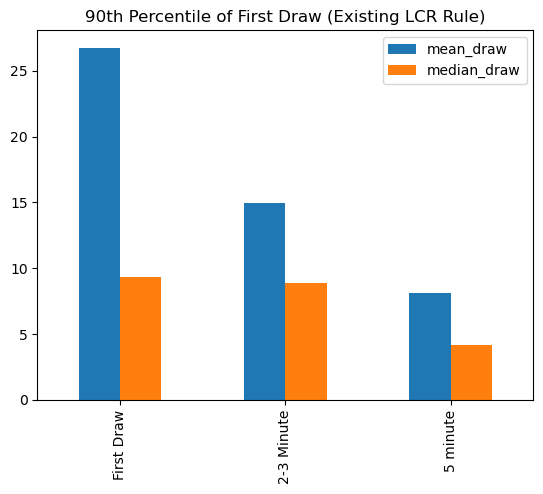

In [36]:
# plot histogram of first draw, second draw and third draw
# appropriate bins

# bins = np.linspace(0, 100, 100)
plotdata = pd.DataFrame(
    {'mean_draw':[timed_value_df['First Draw'].mean(),timed_value_df['Second Draw'].mean(),timed_value_df['Third Draw'].mean()],
    'median_draw':[timed_value_df['First Draw'].median(),timed_value_df['Second Draw'].median(),timed_value_df['Third Draw'].median()]},
    index=['First Draw', '2-3 Minute','5 minute'])

plotdata.plot(kind='bar')
plt.title("90th Percentile of First Draw (Existing LCR Rule)")
plt.show()


In [37]:
seq_df = pd.read_csv(seq_dir)

seq_df.head(5)

,Unnamed: 0,Date.Sampled,Address,X1st.Draw,X2nd.Draw,X3rd.Draw,X4th.Draw,X5th.Draw,X6th.Draw,X7th.Draw,...,X11th.Draw,PIN,Township Code,Neighborhood Code,Sale Price,Age,ZIP,Longitude,Latitude,Tract Median Income
0,0,9/4/2019,100XX S BELL AVE,1.52,1.37,1.59,2.53,2.44,1.90,2.45,...,4.35,25-07-311-006-0000,72.0,72271.0,280000.0,94.0,60643-1903,-87.677779,41.710994,122727.0
1,1,7/16/2016,100XX S CALHOUN AVE,3.70,2.62,8.83,13.80,13.20,13.60,12.30,...,2.75,26-07-150-042-0000,70.0,70180.0,NaN,72.0,60617-5354,-87.561811,41.713056,44423.0
2,2,12/17/2019,100XX S CALUMET AVE,4.02,5.35,6.97,6.55,17.70,16.60,12.10,...,8.72,25-10-313-023-0000,70.0,70220.0,NaN,72.0,60628-2122,-87.615468,41.712462,40612.0
3,3,12/14/2019,100XX S CARPENTER ST,9.54,7.31,6.95,5.63,4.91,7.15,12.40,...,7.23,25-08-410-026-0000,72.0,72282.0,NaN,70.0,60643-2248,-87.649387,41.711889,37207.0
4,4,7/14/2021,100XX S CARPENTER ST,14.00,11.00,8.83,8.12,8.69,7.14,11.00,...,NaN,25-08-410-039-0000,72.0,72282.0,NaN,66.0,60643-2248,-87.649360,41.710831,37207.0


In [38]:
merged_df = pd.merge(timed_df, seq_df, on='Address')

In [39]:
merged_df = merged_df.drop(['Unnamed: 0','PIN', 'Township Code','Neighborhood Code','Latitude','Longitude','X11th.Draw'], axis=1)

In [40]:
len(merged_df) == len(timed_df)

False

In [41]:
len(merged_df) == len(seq_df)

False